# **Data Cleaning Case**

**Outline:**
1. Plotting in Python
    - Introduction to Seaborn
       - What is Seaborn
       - Struktur Data yang diterima Seaborn
    - tutorial plot dengan seaborn.
       - 1d plot: histogram, boxplot
       - 2d plot: scatter, boxplot, line plot
       - correlation plot


2. Styling Plot:
   - Mengubah skala X and Y tick
   - Menambahkan Label axes
   - Menambahkan Judul dan Legenda
   - Object-Oriented API and Subplots
   - line style
   - marker type
   - color (line & marker)
   - Seaborn Figure Style

# Plotting in Python

## 1.1 Introduction to Seaborn

### 1.1.1 Apa itu Seaborn?

- Seaborn adalah library yang dapat dipakai utnuk membuat grafik statistik.


- Seaborn dibangun berdasarkan Matplotlib dan terintegrasi dengan data struktur pandas.


- Dokumentasi: https://seaborn.pydata.org/introduction.html

### 1.1.2 Perbedaan Seaborn dengan Matplotlib.Pyplot

1. Kegunaan
    - Matplotlib: untuk plotting sederhana
    - Seaborn: tersedia pola visualisasi yang lebih bervariasi. Difokuskan untuk visualisasi statistik.
    
    
2. Visualisasi
    - Matplotlib: terintegrasi dengan NumPy dan Pandas, mirip dengan plotting command pada MATLAB.
    - Seaborn: lebih terintegrasi dengan Pandas. Lebih fokus pada arti dari elemen dalam plot daripada bagaimana menggambarkannya.


3. Data Frame dan Arrays
    - Matplotlib: bekerja dengan data frame dan arrays. Bisa memanggil `plot()` tanpa parameter.
    - Seaborn: bekerja dengan keseluruhan dataset dan lebih intuitif dari Matplotlib. Memanggil `plot()` harus menggunakan parameter


4. Flexibilitas
    - Matplotlib: sangat customizable
    - Seaborn: menyediakan tema-tema default


5. Use case
    - Matplotlib: customizable plotting
    - Saborn: plotting statistikal

### 1.1.3 Prepare Dataset and Import Seaborn

untuk dapat menggunakan library **Seaborn** kita harus meng-import library tersebut terlebih dahulu. Jika:
* Menggunakan *Google Colab* maka dapat langsung melakukan import
* Menggunakan komputer *Local* maka pastikan Seaborn telah diinstall dengan `pip install seaborn`, baru setelah terinstall dapat melakukan import

untuk keperluan praktik visualisasi menggunakan Seaborn, pada course ini akan digunakan dataset (House-Price)[https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data]

#### 1.1.3.1 Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1.3.2 Read data

In [2]:
# define dataset path
data_path = "../data/raw/train.csv"

In [3]:
# read dataset
df = pd.read_csv(data_path)
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### 1.1.4 Seaborn Accepted Data Structure

- Seaborn mendukung beberapa format dataset yang direpresentasikan dengan objek dari library `pandas` dan `numpy` serta list dan dictionary.


- Ada dua jenis bentuk dataset yang diterima oleh Seaborn:
    1. Long-form data
    2. Wide-form data


- Long-form data memiliki karakteristik:
    1. Setiap variabel adalah sebuah kolom
    2. Setiap observasi adalah sebuah baris


- Wide-form data berkarakteristik seperti data yang sering dilihat di spreadsheet dimana kolom dan baris memuat tingkatan variabel yang berbeda.


Dokumentasi: https://seaborn.pydata.org/tutorial/data_structure.html


<img src="https://seaborn.pydata.org/_images/data_structure_19_0.png" alt="Drawing" width= 500px;/>

[Source](https://seaborn.pydata.org/_images/data_structure_19_0.png)

In [5]:
# contoh data long-form
lgfrm_house = df[["MSZoning", "LotFrontage", "SaleCondition", "SalePrice"]]
lgfrm_house

,MSZoning,LotFrontage,SaleCondition,SalePrice
0,RL,65.0,Normal,208500
1,RL,80.0,Normal,181500
2,RL,68.0,Normal,223500
3,RL,60.0,Abnorml,140000
4,RL,84.0,Normal,250000
...,...,...,...,...
1455,RL,62.0,Normal,175000
1456,RL,85.0,Normal,210000
1457,RL,66.0,Normal,266500
1458,RL,68.0,Normal,142125


In [11]:
# contoh data wide-form
flight = sns.load_dataset("flights")
wdfrm_flight = flight.pivot(index="year", columns="month", values="passengers")
wdfrm_flight.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


## 1.2 Plotting with Seaborn

Menggunakan data house price yang sebelumnya telah kita baca, akan dilakukan plotting menggunakan seaborn

**Outline:**
* 1D Plot
    - Histogram
    - Boxplot
* 2D Plot
    - Scatter Plot
    - Boxplot 2D
    - Line plot
    - Correlation plot

### 1.2.1 1D Plot (Histogram)

Histogram paling sering digunakan untuk mengetahui distribusi data (atau bentuk data) pada tahap EDA sehingga bisa mengambil berbagai keputusan terhadap fitur yang di analisis.

further reading: [Seaborn/histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)

Misal, kita ingin melihat bentuk dari kolom SalePrice

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

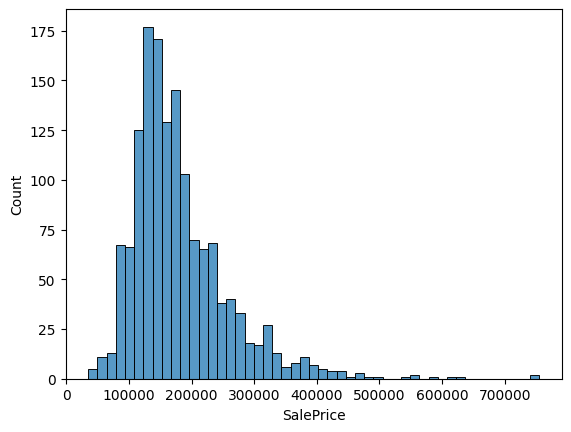

In [12]:
sns.histplot(data=df, x="SalePrice")

kita juga bisa melihat sebaran `SalePrice` berdasarkan kategori pada `MSZoning` dengan menambahkan parameter `hue`

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

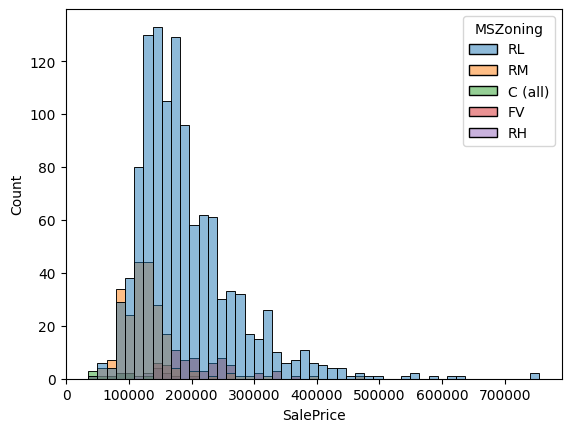

In [15]:
sns.histplot(data=df, x="SalePrice", hue="MSZoning")

**QUIZ #1**

* gambarkan bentuk data kolom `GrLiveArea` berdasarkan kategori pada `LotShape`

In [19]:
# jawaban
# sns.histplot(data=df, x="GrLivArea", hue="LotShape")

### 1.2.2 1D Plot (Boxplot)

Boxplot biasanya digunakan untuk melihat sebaran data dari suatu kolom yang dilengkapi informasi bentuk data seperti mean, Q1, Q3.

umumnya, boxplot dipakai pada tahap EDA untuk mengidentifikasi secara kualitatif apakah terdapat outlier pada suatu kolom

further reading: [Seaborn/boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Misal kita ingin melihat sebaran data pada kolom `SalePrice`

<AxesSubplot: xlabel='SalePrice'>

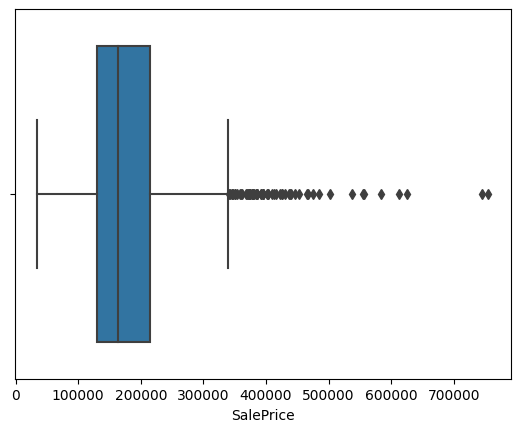

In [20]:
sns.boxplot(data=df, x="SalePrice")

**QUIZ #2**

* buatlah boxplot untuk kolom "GrLivArea"

### 1.2.3 2D Plot (Scatter)

Scatterplot biasanya digunakan untuk melihat hubungan antara dua kolom/fitur numerik.

further reading: [Seaborn/scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

misal kita ingin melihat hubungan antara `GrLivArea` dengan `SalePrice`

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

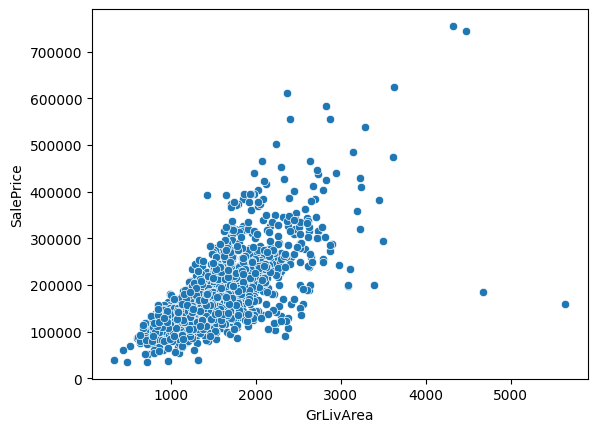

In [31]:
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")

**QUIZ #3**

lihatlah hubungan antara kolom `LotFrontage` dengan `SalePrice` menggunakan scatterplot!

In [ ]:
# jawaban
# sns.scatterplot(data=df, x="LotFrontage", y="SalePrice")

### 1.2.4 2D Plot (Boxplot)

selain dapat melihat bentuk data numerik pada satu variabel (kolom), seaborn juga mendukung grafik boxplot yang menggambarkan hubungan antara kolom numerik dengan kategori-kategori yang terdapat dalam kolom kategorik.

misal kita ingin melihat bentuk data `SalePrice` berdasarkan setiap kategori pada `MSZoning`

<AxesSubplot: xlabel='SalePrice', ylabel='MSZoning'>

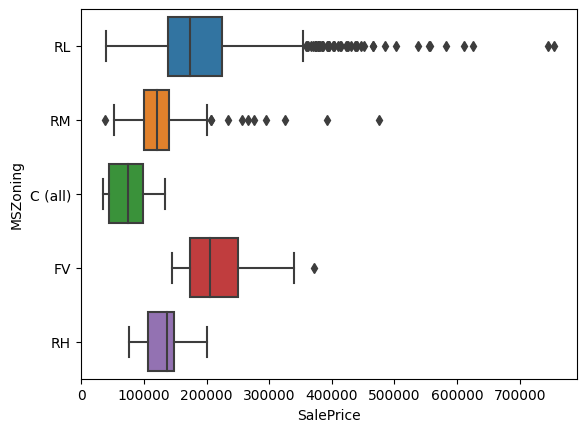

In [35]:
sns.boxplot(data=df, x="SalePrice", y="MSZoning")

kemudian, kita bisa menambahkan pengelompokan boxplot yang telah dibuat di atas berdasarkan kategori pada kolom kategorik lainnya dengan parameter `hue`

misal kita tambahkan `CentralAir` yang memiliki dua kategori

<AxesSubplot: xlabel='SalePrice', ylabel='MSZoning'>

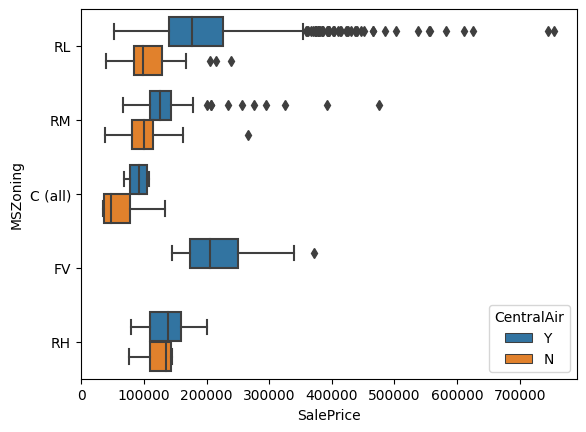

In [36]:
sns.boxplot(data=df, x="SalePrice", y="MSZoning", hue="CentralAir")

**QUIZ #4**

lihatlah bentuk sebaran `GrLivArea` berdasarkan kategori pada `Foundation` dan kelompokkan berdasar kategori pada `LandSlope`!

In [ ]:
# jawaban
# sns.boxplot(data=df, x="GrLivArea", y="Foundation", hue="LandSlope")

### 1.2.5 2D Plot (Lineplot)

Sama seperti scatterplot, lineplot digunakan untuk melihat hubungan antara dua variabel (kolom) numerik. Jika pada scatterplot tiap pasangan x dan y digambarkan menggunakan titik-titik, lineplot menggambarkan titik-titik x dan y tersebut dengan menghubungkan garis diantara titik-titik nya

further reading: [seaborn/lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

misal kita ingin melihat hubungan antara `GrLivArea` dengan `SalePrice`

<AxesSubplot: xlabel='GrLivArea', ylabel='SalePrice'>

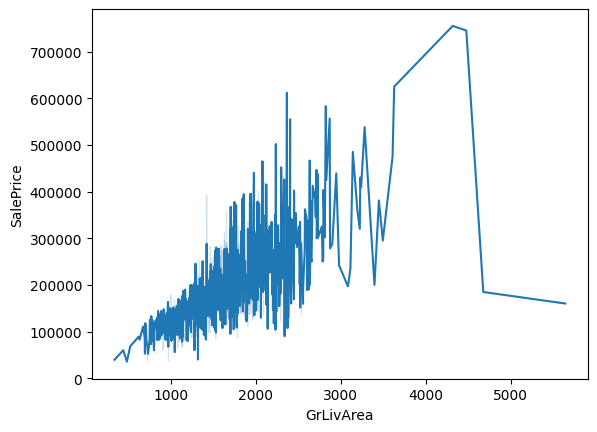

In [38]:
sns.lineplot(data=df, x="GrLivArea", y="SalePrice")

**QUIZ #5**

Lihatlah hubungan antara `LotFrontage` dengan `SalePrice` menggunakan lineplot!

### 1.2.6 Correlation Plot

Kita dapat melihat hubungan antara kolom-kolom numerik secara utuh pada suatu dataset.

Namun, untuk dapat menggambarkan corrplot menggunakan fungsi `.heatmap()` dari seaborn, kita harus terlebih dahulu menghitung korealasi antar variabel numerik menggunakan fungsi `corr()` dari Pandas.

further reading: [seaborn/heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

<AxesSubplot: >

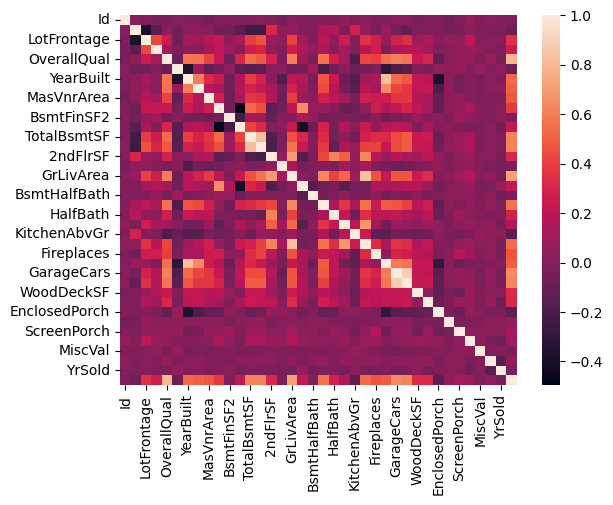

In [43]:
corr = df.corr(method="pearson", numeric_only=True)
sns.heatmap(corr)

**QUIZ #6**

Gambarkan heatmap menggunakan seaborn tanpa melibatkan kolom `Id`!